<a href="https://colab.research.google.com/github/KainatAzhar/Advanced-Image-Classification-with-Transfer-Learning-on-CIFAR-10/blob/main/notebooks/lstm_forecasting_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Advanced Time Series Forecasting with LSTM

This notebook demonstrates how to build an LSTM model to forecast a time series. The process includes data generation, preprocessing, model building, training, and evaluation.

## 1. Setup and Data Generation

First, we import the necessary libraries and generate a synthetic time series dataset that includes a trend, seasonality, and some noise.

Generating synthetic time series data...


<Figure size 1200x600 with 0 Axes>

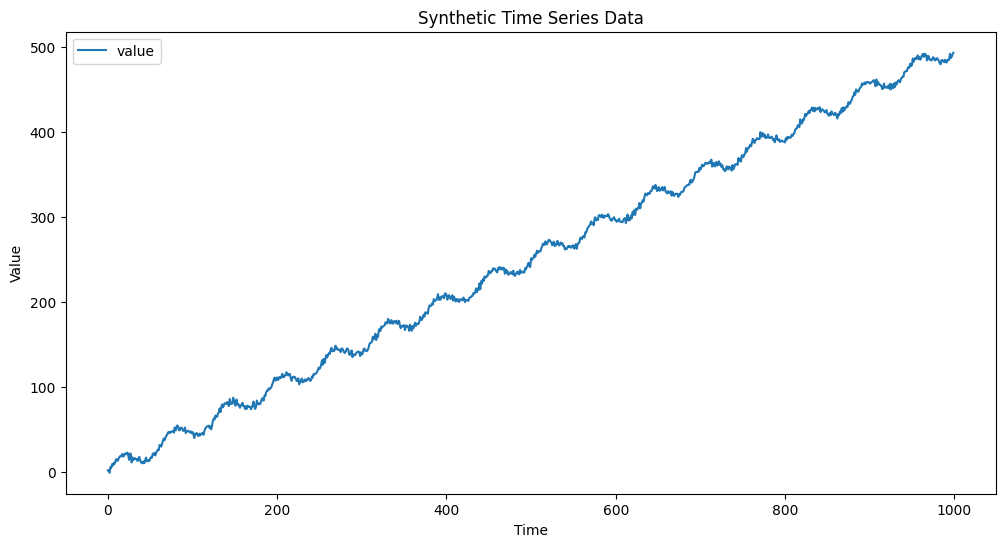

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

print("Generating synthetic time series data...")

# Generate a synthetic time series with a trend and seasonality
def generate_time_series(num_points):
    t = np.arange(num_points)
    data = 0.5 * t + 10 * np.sin(t / 10) + np.random.randn(num_points) * 2
    return data

time_series_data = generate_time_series(1000)

# Convert to DataFrame for easier handling
df = pd.DataFrame(time_series_data, columns=['value'])

# Plot the generated data
plt.figure(figsize=(12, 6))
df.plot(title='Synthetic Time Series Data', figsize=(12, 6))
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

## 2. Data Preprocessing and Feature Engineering

We scale the data to a range of 0-1 for better model performance and transform the series into a supervised learning problem by creating sequences of past data points to predict a future value.

In [2]:
print("Preprocessing data...")

# Scale the data to be between 0 and 1
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df['value'].values.reshape(-1, 1))

# Create sequences for LSTM
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:(i + seq_length), 0])
        y.append(data[i + seq_length, 0])
    return np.array(X), np.array(y)

SEQUENCE_LENGTH = 50
X, y = create_sequences(scaled_data, SEQUENCE_LENGTH)

# Reshape for LSTM model input [samples, time steps, features]
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

Preprocessing data...


## 3. Building the LSTM Model

We split the data into training and testing sets and define a Sequential model with stacked LSTM layers and Dropout for regularization.

In [3]:
# Split data into training and testing sets (80% train, 20% test)
split_index = int(0.8 * len(X))
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

print("Building the LSTM model...")

# Define the model architecture
model = Sequential()
model.add(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=100))
model.add(Dropout(0.2))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Display the model summary
model.summary()

Building the LSTM model...


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 50, 100)        │        40,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 50, 100)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100)            │        80,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 121,301 (473.83 KB)

 Trainable params: 121,301 (473.83 KB)

 Non-trainable params: 0 (0.00 B)

## 4. Training and Evaluation

Now we train the model on our training data and evaluate its performance on the unseen test data.

In [4]:
print("Training the model...")

history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

print("\nEvaluating the model...")
test_loss = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Mean Squared Error (MSE): {test_loss:.4f}")

Training the model...
Epoch 1/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 7s 147ms/step - loss: 0.0766 - val_loss: 1.6526e-04
Epoch 2/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 106ms/step - loss: 0.0038 - val_loss: 0.0051
Epoch 3/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 81ms/step - loss: 0.0019 - val_loss: 3.9225e-04
Epoch 4/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 76ms/step - loss: 0.0015 - val_loss: 3.1231e-04
Epoch 5/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 76ms/step - loss: 0.0013 - val_loss: 7.3563e-04
Epoch 6/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 107ms/step - loss: 0.0014 - val_loss: 7.7993e-04
Epoch 7/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 76ms/step - loss: 0.0011 - val_loss: 2.3266e-04
Epoch 8/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 75ms/step - loss: 0.0012 - val_loss: 2.2476e-04
Epoch 9/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 82ms/step - loss: 0.0011 - val_loss: 6.9418e-04
Epoch 10/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 79ms/step - loss: 0.0011 - val_loss: 0.0013
Epoch 11/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 126ms/step - loss: 0.0016 - val_loss: 1.6758e-04
E

## 5. Visualization of Results

Finally, we use the trained model to make predictions on the test set and plot them against the actual values to visually assess the model's accuracy.

Generating predictions and visualizing results...
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 102ms/step


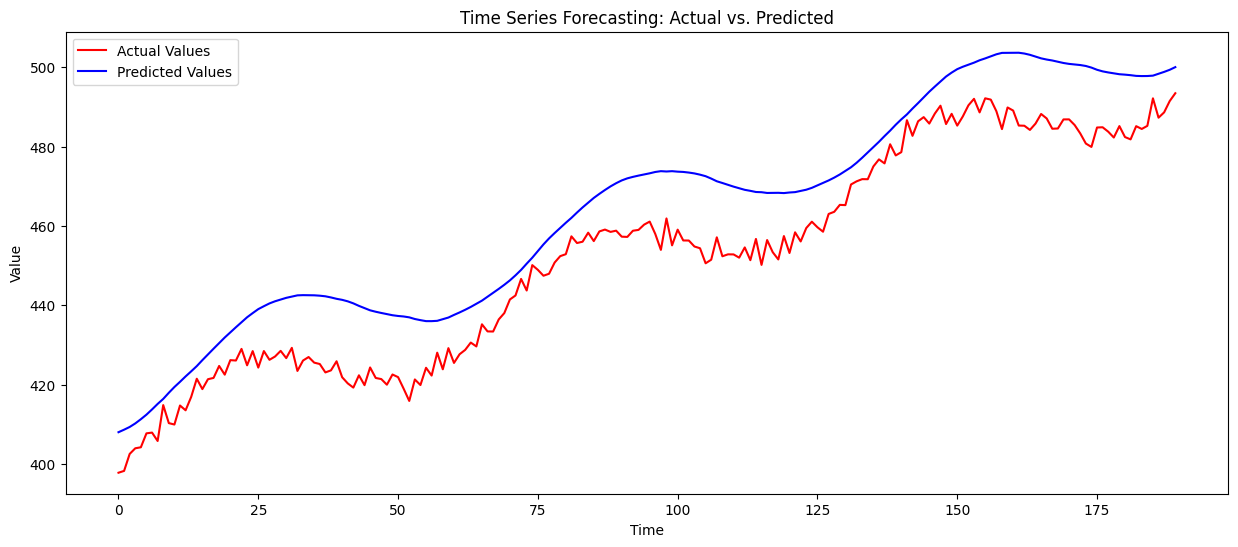

In [5]:
print("Generating predictions and visualizing results...")

# Make predictions
predictions_scaled = model.predict(X_test)

# Inverse transform predictions and actual values to the original scale
predictions = scaler.inverse_transform(predictions_scaled)
actual = scaler.inverse_transform(y_test.reshape(-1, 1))

# Plot the results
plt.figure(figsize=(15, 6))
plt.plot(actual, color='red', label='Actual Values')
plt.plot(predictions, color='blue', label='Predicted Values')
plt.title('Time Series Forecasting: Actual vs. Predicted')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()